In [11]:
# load necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('loaded')

loaded


In [12]:
df = pd.read_excel("market data.xlsx")
df.head()

,2023 Months,Product_Sector,Campaign_Goal,Channel_Used,Impressions,Clicks,Shares
0,Jan,Fashion,Brand Awareness,Facebook,1625,487,35
1,Jan,Fashion,Increase Sales,Facebook,1682,516,13
2,Jan,Fashion,Market Expansion,Facebook,2314,714,14
3,Jan,Fashion,Product Launch,Facebook,1537,477,33
4,Jan,Food,Brand Awareness,Facebook,1969,598,13


In [13]:
pd.set_option('display.Max.rows',None)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2023 Months     720 non-null    object
 1   Product_Sector  720 non-null    object
 2   Campaign_Goal   720 non-null    object
 3   Channel_Used    720 non-null    object
 4   Impressions     720 non-null    int64 
 5   Clicks          720 non-null    int64 
 6   Shares          720 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 39.5+ KB


In [15]:
df.isnull().sum()

2023 Months       0
Product_Sector    0
Campaign_Goal     0
Channel_Used      0
Impressions       0
Clicks            0
Shares            0
dtype: int64

## Data Cleaning

In [16]:
''' 1st column '''
# replace Noviembre with Nov
df['2023 Months'].value_counts()
df['2023 Months'] = df['2023 Months'].replace('Noviembre','Nov') # 
df['2023 Months'].value_counts()

2023 Months
Jan    60
Feb    60
Mar    60
Apr    60
May    60
Jun    60
Jul    60
Aug    60
Sep    60
Oct    60
Nov    60
Dec    60
Name: count, dtype: int64

In [17]:
df.columns

Index(['2023 Months', 'Product_Sector', 'Campaign_Goal', 'Channel_Used',
       'Impressions', 'Clicks', 'Shares'],
      dtype='object')

In [18]:
''' 2nd column'''
df['Product_Sector'].value_counts()
df['Product_Sector']=df['Product_Sector'].replace({'H$m£':'Home','Tech$':'Technology','Fashion!!!!!':'Fashion'})
df['Product_Sector'].value_counts()

Product_Sector
Home          148
Fashion       144
Health        144
Technology    144
Food          140
Name: count, dtype: int64

In [19]:
''' 3rd column'''
df.iloc[:,2].value_counts()
df.iloc[:,2] =df.iloc[:,2].replace('Increase S@l£s','Increase Sales')
df.iloc[:,2].value_counts()

Campaign_Goal
Brand Awareness     180
Increase Sales      180
Market Expansion    180
Product Launch      180
Name: count, dtype: int64

In [20]:
''' 4th column'''
df.iloc[:,3].value_counts()
df.iloc[:,3]=df.iloc[:,3].replace({'Face b**k':'Facebook','Instgrm':'Instagram'})
df.iloc[:,3].value_counts()

Channel_Used
Facebook     240
Instagram    240
YouTube      240
Name: count, dtype: int64

In [21]:
df.columns

Index(['2023 Months', 'Product_Sector', 'Campaign_Goal', 'Channel_Used',
       'Impressions', 'Clicks', 'Shares'],
      dtype='object')

In [22]:
''' now we change the name of our dataset'''
df1 = df.iloc[:,[4,5,6]]
df1.head()

,Impressions,Clicks,Shares
0,1625,487,35
1,1682,516,13
2,2314,714,14
3,1537,477,33
4,1969,598,13


In [23]:
''' Define a function to detect outliers based on IQR 
and return lower and upper_bound'''
def outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound,upper_bound

# Detect outliers for 'Impressions', 'Clicks' and 'Shares'
columns = ['Impressions','Clicks','Shares']
lower_bound , upper_bound = outliers_iqr(df1,columns[0]) # if you store these values in varriabls you can use outside the function
lower_bound1 , upper_bound1 = outliers_iqr(df1,columns[1]) # if you store these values in varriabls you can use outside the function
lower_bound2 , upper_bound2 = outliers_iqr(df1,columns[2]) # if you store these values in varriabls you can use outside the function
print('lower bound', lower_bound)
print('upper bound', upper_bound)
print('-----------------------')
print('lower bound', lower_bound1)
print('upper bound', upper_bound1)
print('---------------------------')
print('lower bound', lower_bound2)
print('upper bound', upper_bound2)

lower bound -248.0
upper bound 3518.0
-----------------------
lower bound -195.0
upper bound 1193.0
---------------------------
lower bound -22.0
upper bound 74.0


In [24]:
''' Repalce 'impressions' lower outlier with zero and upper outlier with upper_bound'''
df1['Impressions'] = np.where(df1['Impressions']<0,0,df1['Impressions'])
df1['Impressions'] = np.where(df1['Impressions']>upper_bound,upper_bound,df1['Impressions'])

C:\Users\Temii\AppData\Local\Temp\ipykernel_12228\2796889476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Impressions'] = np.where(df1['Impressions']<0,0,df1['Impressions'])
C:\Users\Temii\AppData\Local\Temp\ipykernel_12228\2796889476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Impressions'] = np.where(df1['Impressions']>upper_bound,upper_bound,df1['Impressions'])


In [25]:
''' Repalce 'CLicks' lower outlier with zero and upper outlier with upper_bound'''
df1['Clicks'] = np.where(df1['Clicks']<0,0,df1['Clicks'])
df1['Clicks'] = np.where(df1['Clicks']>upper_bound1,upper_bound1,df1['Clicks'])

C:\Users\Temii\AppData\Local\Temp\ipykernel_12228\2111228964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Clicks'] = np.where(df1['Clicks']<0,0,df1['Clicks'])
C:\Users\Temii\AppData\Local\Temp\ipykernel_12228\2111228964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Clicks'] = np.where(df1['Clicks']>upper_bound1,upper_bound1,df1['Clicks'])


In [26]:
''' Repalce 'Share' lower outlier with zero and upper outlier with upper_bound'''
df1['Shares'] = np.where(df1['Shares']<0,0,df1['Shares'])
df1['Shares'] = np.where(df1['Shares']>upper_bound2,upper_bound2,df1['Shares'])

C:\Users\Temii\AppData\Local\Temp\ipykernel_12228\270385639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Shares'] = np.where(df1['Shares']<0,0,df1['Shares'])
C:\Users\Temii\AppData\Local\Temp\ipykernel_12228\270385639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Shares'] = np.where(df1['Shares']>upper_bound2,upper_bound2,df1['Shares'])


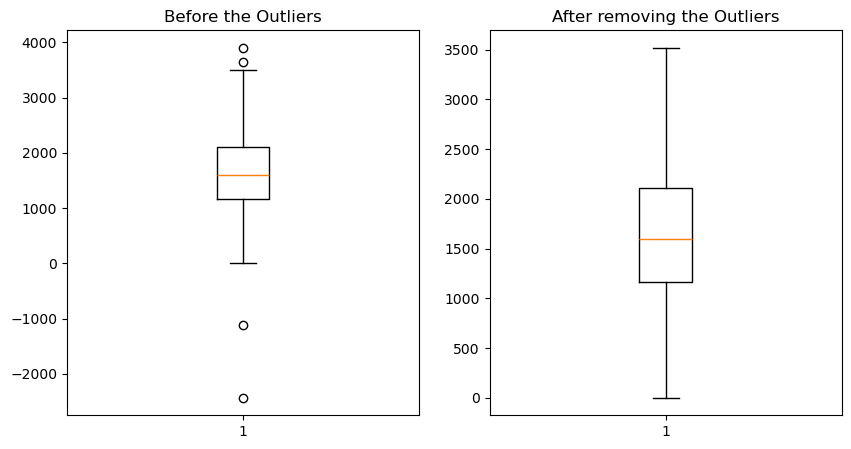

In [27]:
'''column:5th Compare Before and after Outliers and Stats'''
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].boxplot(df.iloc[:,4])
ax[0].set_title('Before the Outliers')
ax[1].boxplot(df1['Impressions'])
ax[1].set_title('After removing the Outliers')
plt.show()


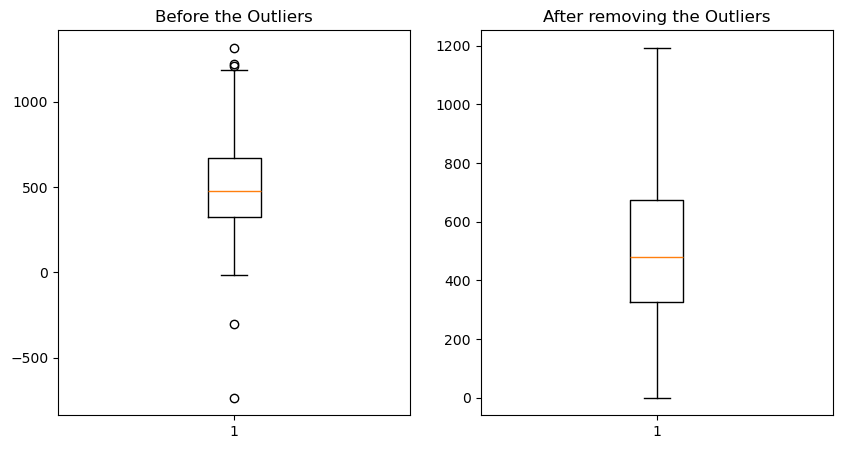

count     720.000000
mean      506.125000
std       253.614995
min      -736.000000
25%       325.500000
50%       479.000000
75%       672.500000
max      1317.000000
Name: Clicks, dtype: float64
----------------------


count     720.000000
mean      507.352778
std       248.191815
min         0.000000
25%       325.500000
50%       479.000000
75%       672.500000
max      1193.000000
Name: Clicks, dtype: float64

In [28]:
'''column:6th Compare Before and after Outliers and Stats'''
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].boxplot(df.iloc[:,5])
ax[0].set_title('Before the Outliers')
ax[1].boxplot(df1['Clicks'])
ax[1].set_title('After removing the Outliers')
plt.show()

print(df['Clicks'].describe())
print('----------------------')
df1['Clicks'].describe()

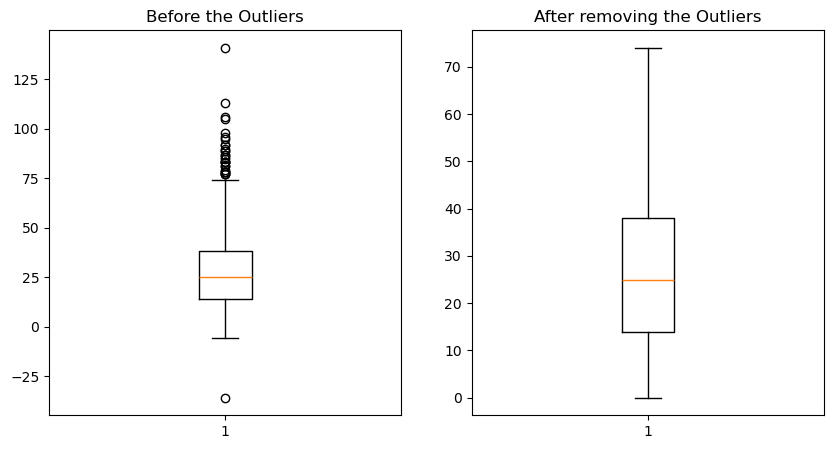

count    720.000000
mean      27.973611
std       20.222700
min      -36.000000
25%       14.000000
50%       25.000000
75%       38.000000
max      141.000000
Name: Shares, dtype: float64
-------------------


count    720.000000
mean      27.416667
std       18.170151
min        0.000000
25%       14.000000
50%       25.000000
75%       38.000000
max       74.000000
Name: Shares, dtype: float64

In [29]:
'''column:7th Compare Before and after Outliers and Stats'''
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].boxplot(df.iloc[:,6])
ax[0].set_title('Before the Outliers')
ax[1].boxplot(df1['Shares'])
ax[1].set_title('After removing the Outliers')
plt.show()

print(df['Shares'].describe())
print('-------------------')
df1['Shares'].describe()

In [30]:
# add df1 data into df
df[['Impressions','Clicks','Shares']] = df1

In [31]:
df.iloc[:,4].mean()

1658.7097222222221

In [32]:
df['2023 Months'].value_counts()

2023 Months
Jan    60
Feb    60
Mar    60
Apr    60
May    60
Jun    60
Jul    60
Aug    60
Sep    60
Oct    60
Nov    60
Dec    60
Name: count, dtype: int64

In [33]:
''' np.where() is work like nested if and this is complicated for beginner But next box we use simpler way to extract quarters from months'''
df['Quarter'] = np.where(df['2023 Months'].isin(['Jan',"Feb","Mar"]),"Q1",
                         np.where(df['2023 Months'].isin(['Apr',"May","Jun"]),"Q2",
                                  np.where(df['2023 Months'].isin(['Jul',"Aug","Sep"]),"Q3",
                                           np.where(df['2023 Months'].isin(['Oct',"Nov","Dec"]),"Q4",np.nan))))

In [34]:
''' Simple and best way to Extract quarters from Month column'''
# df['quarter'] = pd.to_datetime(df['2023 Months'], format='%b').dt.quarter
# df['Quarter'] = df['quarter'].replace({1:'Q1',2:"Q2",3:'Q3',4:'Q4'})


' Simple and best way to Extract quarters from Month column'

In [35]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,2023 Months,Product_Sector,Campaign_Goal,Channel_Used,Impressions,Clicks,Shares,Quarter


In [36]:
df.iloc[:,[4,5,6]]= df.iloc[:,[4,5,6]].replace(0,np.nan)
df.dropna(subset=['Impressions','Clicks','Shares'],inplace=True)
df.reset_index(drop=True)
df_filtered = df[df.iloc[:,[4,5,6]].isnull().sum(axis=1) < 2]

print(df_filtered)

    2023 Months Product_Sector     Campaign_Goal Channel_Used  Impressions  \
0           Jan        Fashion   Brand Awareness     Facebook       1625.0   
1           Jan        Fashion    Increase Sales     Facebook       1682.0   
2           Jan        Fashion  Market Expansion     Facebook       2314.0   
3           Jan        Fashion    Product Launch     Facebook       1537.0   
4           Jan           Food   Brand Awareness     Facebook       1969.0   
5           Jan           Food    Increase Sales     Facebook       2320.0   
6           Jan           Food  Market Expansion     Facebook       1592.0   
7           Jan           Food    Product Launch     Facebook       1773.0   
8           Jan         Health   Brand Awareness     Facebook       2104.0   
9           Jan         Health    Increase Sales     Facebook       1614.0   
10          Jan         Health  Market Expansion     Facebook       1151.0   
11          Jan         Health    Product Launch     Facebook   

In [37]:
df.head()

,2023 Months,Product_Sector,Campaign_Goal,Channel_Used,Impressions,Clicks,Shares,Quarter
0,Jan,Fashion,Brand Awareness,Facebook,1625.0,487.0,35.0,Q1
1,Jan,Fashion,Increase Sales,Facebook,1682.0,516.0,13.0,Q1
2,Jan,Fashion,Market Expansion,Facebook,2314.0,714.0,14.0,Q1
3,Jan,Fashion,Product Launch,Facebook,1537.0,477.0,33.0,Q1
4,Jan,Food,Brand Awareness,Facebook,1969.0,598.0,13.0,Q1


In [38]:
# df.to_excel('cleaned_data.xlsx')

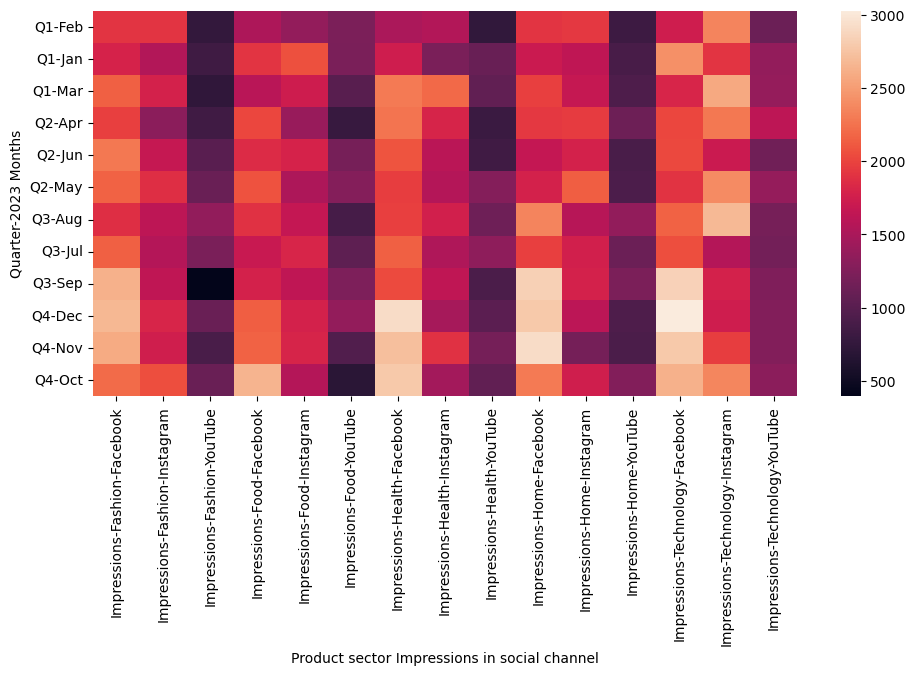

In [78]:
plt.figure(figsize=(25,5))
plt.subplot(121)
sns.heatmap(df.pivot_table(index=['Quarter','2023 Months'],columns=['Product_Sector','Channel_Used'],values=['Impressions']))
# df.pivot_table(index=['Quarter','2023 Months'],columns=['Product_Sector','Channel_Used'],values=['Impressions'])
plt.xlabel('Product sector Impressions in social channel')
plt.show()

In [41]:
import seaborn as sns

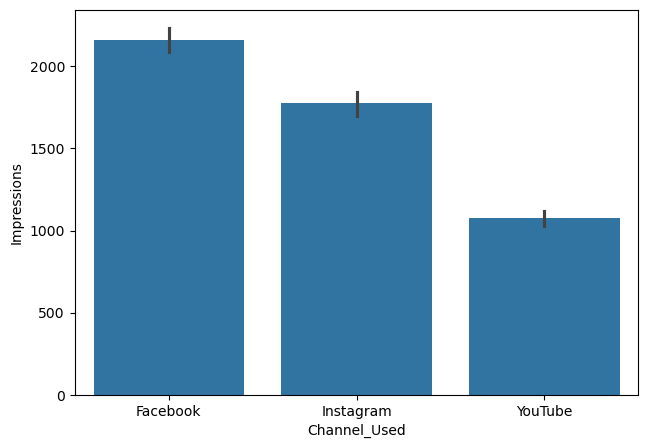

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(data=df,x='Channel_Used',y='Impressions')
plt.show()

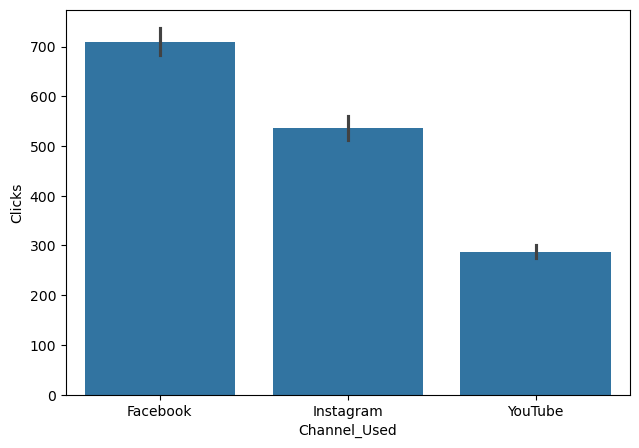

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(data=df,x='Channel_Used',y='Clicks')
plt.show()

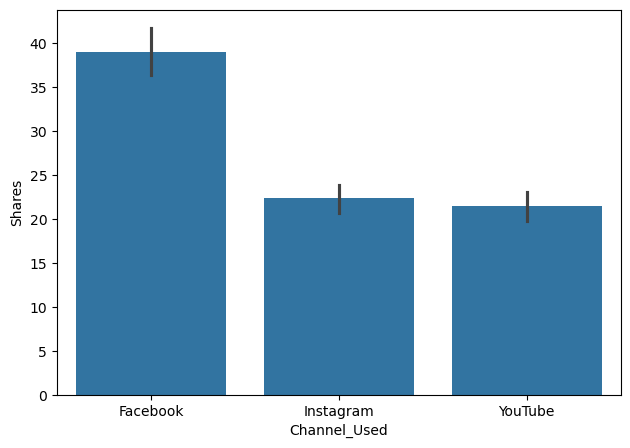

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(data=df,x='Channel_Used',y='Shares')
plt.show()